- Author: Peter Riesebos
- Purpose: Inspecting various metrics from the output stats of a problematic study that loses a lot of it's samples in the genotype QC pipeline.
- Input: plink scount file
- Output: graphs

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import seaborn as sns

In [34]:
df = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP113470/genotypes/merged_sample_counts.scount", sep="\s+")

In [3]:
df

,#IID,HOM_REF_CT,HOM_ALT_CT,HET_CT,MISSING_CT
0,SRR5861977,589428,142148,505000,2092
1,SRR5861979,1195987,20483,22192,6
2,SRR5861980,1192250,22450,23959,9
3,SRR5861994,1197652,20712,20303,1
4,SRR5861999,1021604,74736,141215,1113
5,SRR5862004,1199214,19321,20130,3
6,SRR5862014,1202012,18427,18218,11
7,SRR5862018,1209200,15153,14310,5
8,SRR5862020,1213975,12023,12668,2
9,SRR5862040,1214021,13019,11625,3


In [35]:
df['obs_ct'] = df['HOM_REF_CT'] + df['HOM_ALT_CT'] + df['HET_CT'] + df['MISSING_CT']
df['nonalt_ct'] = df ['HOM_REF_CT'] + df ['MISSING_CT']
df['ref_freq'] = df['nonalt_ct'] / df['obs_ct']

In [36]:
df = df.sort_values(by='ref_freq', ascending=True)

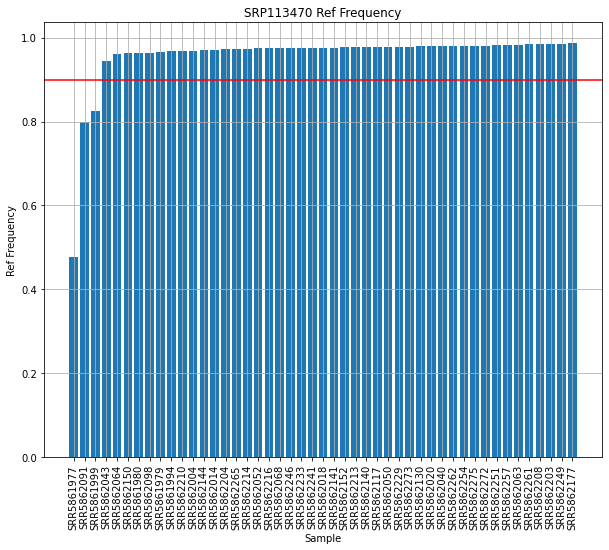

In [38]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.bar(df['#IID'], df['ref_freq'])
plt.title("SRP113470 Ref Frequency")
plt.xlabel("Sample")
plt.ylabel("Ref Frequency")
plt.axhline(y=0.9, color ='r', linestyle = '-') 
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [33]:
df

,#IID,HOM_REF_CT,HOM_ALT_CT,HET_CT,MISSING_CT,obs_ct,nonalt_ct,alt_freq
0,SRR5861977,589428,142148,505000,2092,1238668,591520,0.477545
16,SRR5862091,987129,72776,177617,1146,1238668,988275,0.797853
4,SRR5861999,1021604,74736,141215,1113,1238668,1022717,0.825659
10,SRR5862043,1168104,32732,37821,11,1238668,1168115,0.943041
14,SRR5862064,1190929,21893,25841,5,1238668,1190934,0.961463
23,SRR5862150,1192250,23411,23004,3,1238668,1192253,0.962528
2,SRR5861980,1192250,22450,23959,9,1238668,1192259,0.962533
17,SRR5862098,1193871,20882,23905,10,1238668,1193881,0.963843
1,SRR5861979,1195987,20483,22192,6,1238668,1195993,0.965548
3,SRR5861994,1197652,20712,20303,1,1238668,1197653,0.966888


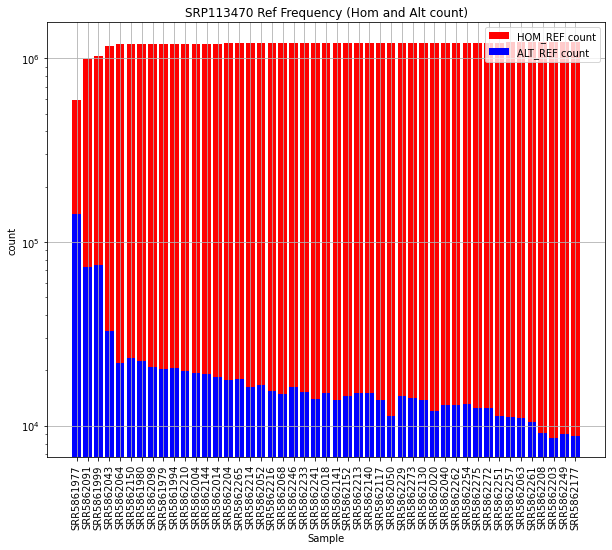

In [61]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.bar(df['#IID'], df['HOM_REF_CT'], color="red", label="HOM_REF count")
# plt.bar(df['#IID'], df['HET_CT'], color="green", label="HET_CT count")
plt.bar(df['#IID'], df['HOM_ALT_CT'], color="blue", label="ALT_REF count")
plt.title("SRP113470 Ref Frequency (Hom and Alt count)")
plt.xlabel("Sample")
plt.ylabel("count")
plt.yscale('log')  # Set the y-axis to a logarithmic scale
# plt.axhline(y=0.9, color ='r', linestyle = '-') 
plt.grid()
plt.legend(loc=1)
plt.xticks(rotation=90)
plt.show()


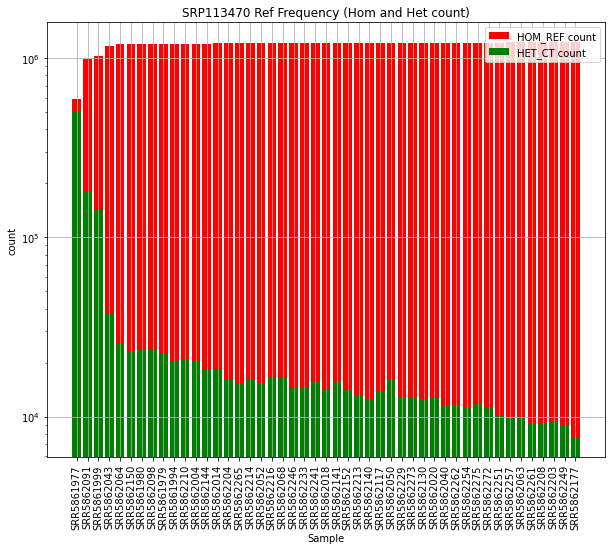

In [60]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.bar(df['#IID'], df['HOM_REF_CT'], color="red", label="HOM_REF count")
plt.bar(df['#IID'], df['HET_CT'], color="green", label="HET_CT count")
# plt.bar(df['#IID'], df['HOM_ALT_CT'], color="blue", label="ALT_REF count")
plt.title("SRP113470 Ref Frequency (Hom and Het count)")
plt.xlabel("Sample")
plt.ylabel("count")
plt.yscale('log')  # Set the y-axis to a logarithmic scale
# plt.axhline(y=0.9, color ='r', linestyle = '-') 
plt.grid()
plt.legend(loc=1)
plt.xticks(rotation=90)
plt.show()

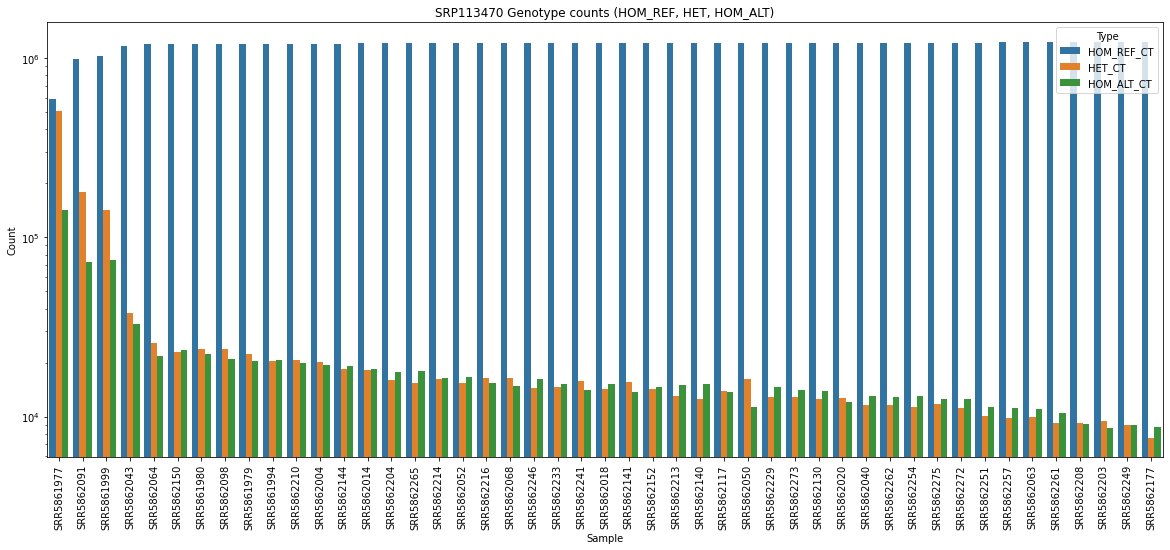

In [68]:
# Melt the dataframe to long format
df_melted = pd.melt(df, id_vars=['#IID'], value_vars=['HOM_REF_CT', 'HET_CT', 'HOM_ALT_CT'], 
                    var_name='Type', value_name='Count')

# Create a figure
plt.figure(figsize=(20, 8), facecolor='white')

# Use seaborn to create a barplot
sns.barplot(data=df_melted, x='#IID', y='Count', hue='Type')

# Set logarithmic scale for y-axis
plt.yscale('log')

# Set plot titles and labels
plt.title("SRP113470 Genotype counts (HOM_REF, HET, HOM_ALT)")
plt.xlabel("Sample")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()